### ERA5-Land hourly data from 1950 to present

This Jupyter notebook will demonstrate how to access and visualise data from the Copernicus Climate Data Store (CDS) dataset **ERA5-Land hourly data from 1950 to present**. It will also show how the dataset's overview image and thumbnail image were generated.

For this demonstration, we will be using the Python package `earthkit` as a one-stop-shop for CDS data access, processing and visulisation. For more information on `earthkit`, including installation instructions, see its [GitHub Repository](https://github.com/ecmwf/earthkit).

In [2]:
import earthkit

#### Retrieving CDS data

Data from the CDS can be accessed through earthkit via the `earthkit.data.from_source()` function. The first argument should be the string `'cds'`, followed by the dataset name (slug), and finally a dictionary containing the contents of your request.

In [5]:
temperature = earthkit.data.from_source(
    'cds',
    'sis-energy-derived-reanalysis',
    {
        'variable': 'electricity_demand',
        'spatial_aggregation': 'country_level',
        'energy_product_type': 'energy',
        'temporal_aggregation': 'daily',
        'format': 'zip',
    },
)

2023-08-02 11:19:33,783 INFO Welcome to the CDS
2023-08-02 11:19:33,786 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-energy-derived-reanalysis
2023-08-02 11:19:34,043 INFO Request is queued
2023-08-02 11:19:35,108 INFO Request is running
2023-08-02 11:19:47,567 INFO Request is completed
2023-08-02 11:19:47,569 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data8/dataset-sis-energy-derived-reanalysis-394a1ac8-e3b6-46dd-828e-b55e58e7aece.zip to /var/folders/vt/7j2c2tmx4m14gn_sg3zpf5l00000gn/T/earthkit-data-mavj/cds-retriever-821b4b509a243fd8ad4ec43e97dd7c4f45fcb1760a4ee07cf88434c1621e8607.cache.tmp (2M)
2023-08-02 11:19:48,263 INFO Download rate 2.9M/s                                                                                                                   


In [10]:
energy_demand = earthkit.data.from_source("file", "/Users/mavj/Downloads/dataset-sis-energy-derived-reanalysis-f6c275e9-adde-4af9-ae5e-c5f718fe8a3d.zip")

  0%|          | 0/1 [00:00<?, ?it/s]

In [37]:
energy_demand[12].to_xarray()

<xarray.DataArray 'spv_cf' (latitude: 185, longitude: 271)>
dask.array<getitem, shape=(185, 271), dtype=float64, chunksize=(185, 271), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -22.0 -21.75 -21.5 -21.25 ... 45.0 45.25 45.5
  * latitude   (latitude) float32 72.5 72.25 72.0 71.75 ... 27.0 26.75 26.5
    time       datetime64[ns] 2023-01-01T12:00:00
Attributes:
    valid_range:  [-32767  32767]
    long_name:    Regional solar PV capacity factor
    units:        kW/kW_installed

#### Generating a simple image

This section will demonstrate how the overview image for this dataset was generated.

To start with, we need to define some *styles* for plotting our variables. For 2m temperature, we want a shaded contour style using the *turbo* colour palette from [matplotlib](https://matplotlib.org/stable/gallery/color/colormap_reference.html). Styles can also have *units* associated with them, so that any data plotted using that style will be converted to use the style's units.

In [3]:
temperature_style = earthkit.maps.styles.Contour(
    colors="turbo",
    levels=range(-40, 41, 2),
    extend="both",
    units="celsius",
)

Now we can produce our plot, using the styles we just defined. We are using *cartopy* to specify a *Nearside Perspective* projection for our plot.

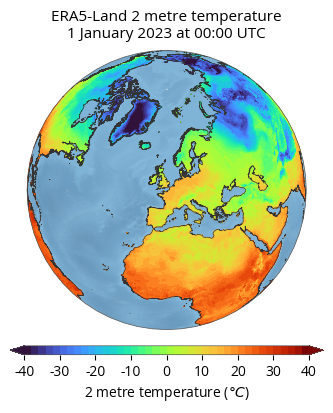

In [4]:
import cartopy.crs as ccrs

earthkit.maps.schema.figsize = (4, 4)

crs = ccrs.NearsidePerspective(central_latitude=50)
chart = earthkit.maps.Superplot(crs=crs)

chart.plot(temperature, style=temperature_style, transform_first=False)

chart.coastlines(resolution="high")
chart.stock_img()

chart.legend(location="bottom")

# For the title, we can take advantage of earthkit-maps metadata
# detection, which allows us to use format keys like 'variable_name'
# and 'time', which are then populated from the metadata of the data
# that's been plotted.
chart.title(
    "ERA5-Land {variable_name}\n"
    "{time:%-d %B %Y} at {time:%H:%M} UTC",
    fontsize=11,
)

chart.save("overview-detail.png")

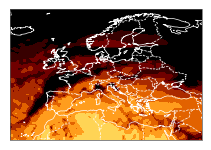

In [51]:
import cartopy.crs as ccrs
import numpy as np

style = earthkit.maps.styles.Contour(
    colors="afmhot",
    levels=np.arange(0, 1, 0.1),
    extend="both",
    
)

earthkit.maps.schema.figsize = (2, 2)
chart = earthkit.maps.Superplot()

chart.contourf(energy_demand[12], style=style)

chart.coastlines(color="white")
chart.borders(color="white", )

chart.save("overview.png")

In [23]:
energy_demand[0].metadata("units")

'kW/kW_installed'

In [52]:
values = [164216.2,32481.3,183117.7,91842.7,144233.9,10275.7,144065.6,1104622.2,81024.4,21797,107586.4,502223.4,232625.5,1131234.7,38785.6,93830,66098.5,632063.9,26230,9789.6,18241.7,8777.3,24459.5,261279.5,413462.2,331949.8,103575,103498.7,108385.1,395865.6,29173.8,68008.2,836103.2]

In [53]:
countries = "AT,BA,BE,BG,CH,CY,CZ,DE,DK,EE,EL,ES,FI,FR,HR,HU,IE,IT,LT,LU,LV,ME,MK,NL,NO,PL,PT,RO,RS,SE,SI,SK,UK".split(",")

In [54]:
len(countries)

33

In [55]:
len(values)

33

In [58]:
import cartopy.io.shapereader as shpreader

reader = shpreader.Reader("/Users/mavj/Downloads/ref-nuts-2021-01m.shp/NUTS_RG_01M_2021_4326_LEVL_0.shp.zip")

In [59]:
reader.records()

<generator object FionaReader.records at 0x2a05cef80>

In [67]:
hmm = next(reader.records())

In [70]:
hmm.attributes["NUTS_ID"]

'CZ'

/var/folders/vt/7j2c2tmx4m14gn_sg3zpf5l00000gn/T/ipykernel_17363/845876511.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("plasma_r")


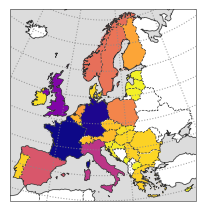

In [117]:
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
import numpy as np

style = earthkit.maps.styles.Contour(
    colors="afmhot",
    levels=np.arange(-10, 0),
    extend="both",
    
)

import matplotlib.cm as cm

earthkit.maps.schema.figsize = (2, 2)
chart = earthkit.maps.Superplot(domain=[-9, 35, 35, 71], rows=1, cols=1)

# chart.contourf(energy_demand[12], style=style)
chart.add_subplot()

chart.land(color="white")
chart.ocean(color="#DCDCDC")

chart.coastlines(zorder=11)
chart.gridlines(draw_labels=False)
chart.borders(zorder=10)
# chart.stock_img()

cmap = cm.get_cmap("plasma_r")

max_value = max(values)

for country in reader.records():
    try:
        value = values[countries.index(country.attributes["NUTS_ID"])]
    except ValueError:
        continue
    norm = value / max_value
    
    shape_feature = ShapelyFeature([country.geometry], ccrs.PlateCarree(), facecolor=cmap(norm), edgecolor='black', lw=0)
    chart[0].ax.add_feature(shape_feature)


chart.save("overview.png")